Import Libraries

In [74]:
!pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91930\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Load dataset 

In [76]:
data = pd.read_csv(r"C:\Users\91930\Downloads\ecommerce_balanced_dataset.csv")
print(data.head())


                        Product Title     Category
0     Best Smartphone for Electronics  Electronics
1  Affordable Charger for Electronics  Electronics
2      New Headphones for Electronics  Electronics
3         Best Laptop for Electronics  Electronics
4  Premium Power Bank for Electronics  Electronics


EDA

In [78]:
print("Dataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product Title  500 non-null    object
 1   Category       500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB
None

Missing Values:
Product Title    0
Category         0
dtype: int64


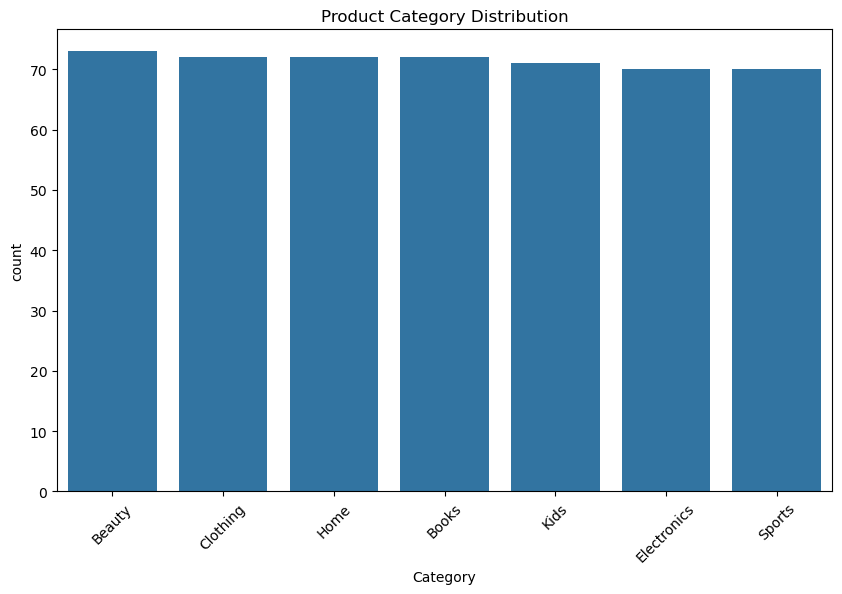

In [79]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Category', order=data['Category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()


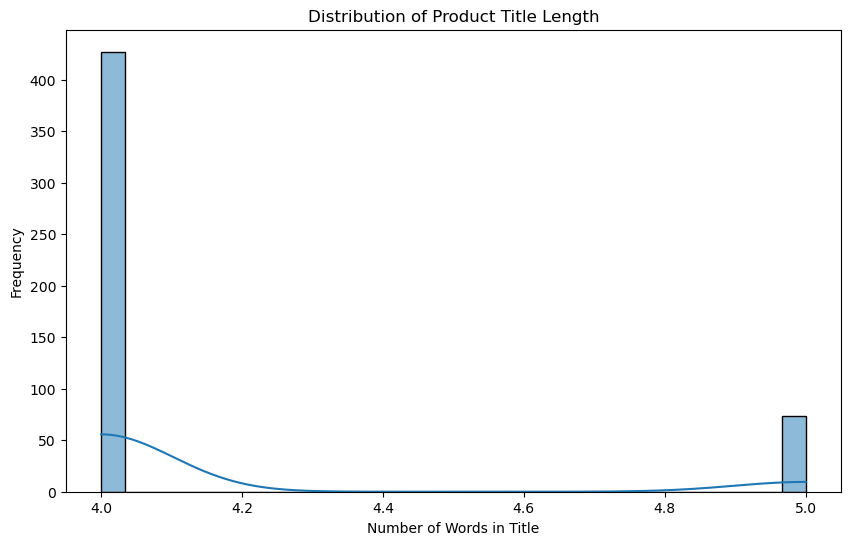

In [80]:
data['TitleLength'] = data['Product Title'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10,6))
sns.histplot(data['TitleLength'], bins=30, kde=True)
plt.title('Distribution of Product Title Length')
plt.xlabel('Number of Words in Title')
plt.ylabel('Frequency')
plt.show()


In [81]:
stop_words = set(stopwords.words('english'))
all_words = ' '.join(data['Product Title'].astype(str)).lower().split()
filtered_words = [word for word in all_words if word not in stop_words]
common_words = Counter(filtered_words).most_common(20)

print("Top 20 most common words:")
for word, freq in common_words:
    print(f"{word}: {freq}")


Top 20 most common words:
premium: 111
top: 106
affordable: 98
new: 95
best: 90
sports: 73
electronics: 72
kids: 72
clothing: 71
home: 71
beauty: 71
books: 70
book: 19
dress: 18
magazine: 13
crayons: 13
tablet: 12
blazer: 12
cushion: 12
shampoo: 12


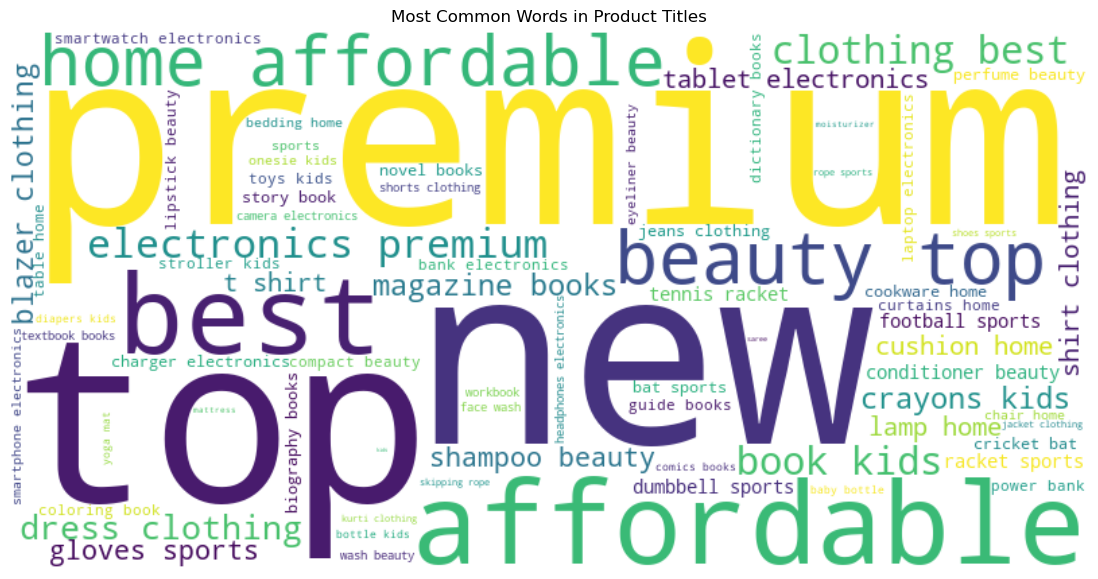

In [82]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Product Titles")
plt.show()


In [83]:
le = LabelEncoder()
data['CategoryEncoded'] = le.fit_transform(data['Category'])


In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    data['Product Title'], data['CategoryEncoded'],
    test_size=0.3, random_state=42, stratify=data['CategoryEncoded']
)


In [85]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


In [86]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (Linear Kernel)": SVC(kernel='linear', probability=True)
}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    
    print("="*50)
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(
        y_test, y_pred,
        target_names=le.inverse_transform(sorted(list(set(y_test))))
    ))


Model: Logistic Regression
Accuracy: 0.9800
Classification Report:
              precision    recall  f1-score   support

      Beauty       1.00      0.95      0.98        22
       Books       1.00      0.95      0.98        21
    Clothing       1.00      0.95      0.98        22
 Electronics       0.95      1.00      0.98        21
        Home       1.00      1.00      1.00        22
        Kids       1.00      1.00      1.00        21
      Sports       0.91      1.00      0.95        21

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

Model: Random Forest
Accuracy: 0.9800
Classification Report:
              precision    recall  f1-score   support

      Beauty       1.00      0.95      0.98        22
       Books       1.00      0.95      0.98        21
    Clothing       1.00      0.95      0.98        22
 Electronics       0.95      1.00      0.98        21
    

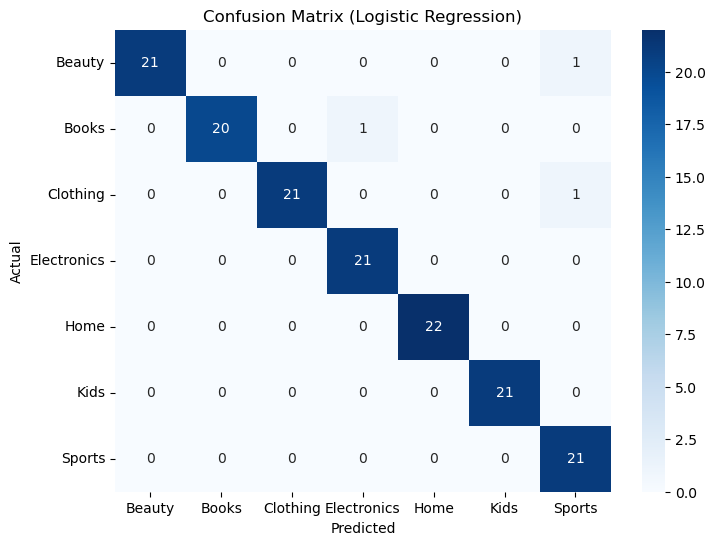

In [87]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


Classification Report:
              precision    recall  f1-score   support

      Beauty       1.00      0.95      0.98        22
       Books       1.00      0.95      0.98        21
    Clothing       1.00      0.95      0.98        22
 Electronics       0.95      1.00      0.98        21
        Home       1.00      1.00      1.00        22
        Kids       1.00      1.00      1.00        21
      Sports       0.91      1.00      0.95        21

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



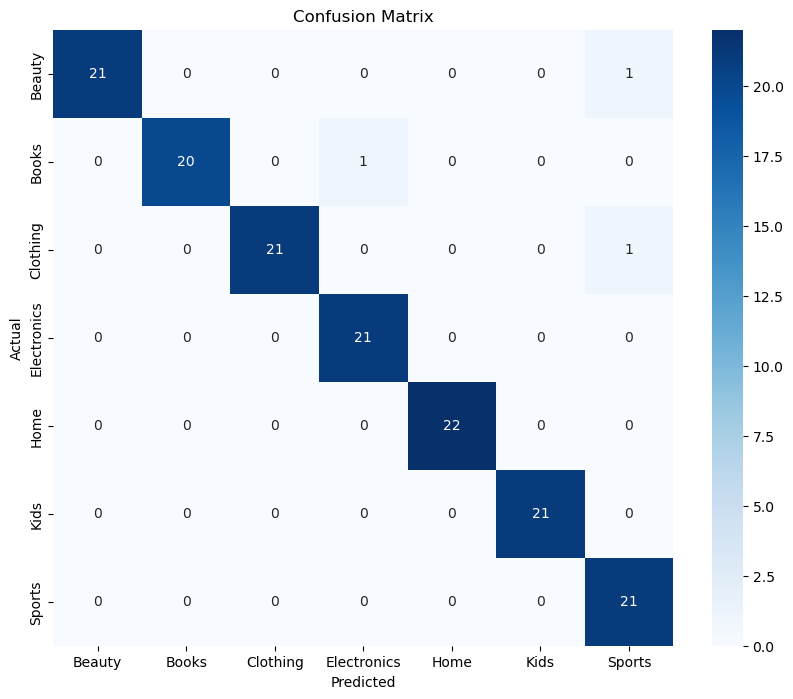

In [88]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report:")
print(classification_report(
    y_test, y_pred,
    target_names=le.inverse_transform(sorted(list(set(y_test))))
))


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.inverse_transform(sorted(list(set(y_test)))),
            yticklabels=le.inverse_transform(sorted(list(set(y_test)))))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [89]:

import numpy as np

feature_names = tfidf.get_feature_names_out()
coefs = model.coef_

# Top 10 influential words for each class
for i, category in enumerate(le.classes_):
    print(f"\nTop 10 words for category: {category}")
    top10 = np.argsort(coefs[i])[-10:]
    for idx in reversed(top10):
        print(f"{feature_names[idx]}: {coefs[i][idx]:.4f}")



Top 10 words for category: Beauty
beauty: 4.0391
lipstick: 1.2817
conditioner: 1.0757
perfume: 1.0277
compact: 1.0042
eyeliner: 0.9420
shampoo: 0.9358
wash: 0.7539
face: 0.7539
moisturizer: 0.5238

Top 10 words for category: Books
books: 4.3550
biography: 1.0416
novel: 1.0371
magazine: 1.0357
dictionary: 0.9162
guide: 0.8148
comics: 0.8113
workbook: 0.7372
textbook: 0.7272
bedding: 0.4940

Top 10 words for category: Clothing
clothing: 4.3827
dress: 1.1915
shirt: 1.1309
blazer: 1.0828
shorts: 1.0324
jeans: 1.0113
kurti: 0.6495
jacket: 0.4974
saree: 0.3157
best: 0.2969

Top 10 words for category: Electronics
electronics: 4.2842
tablet: 1.0353
power: 0.9841
bank: 0.9841
smartwatch: 0.9379
laptop: 0.9284
smartphone: 0.9177
charger: 0.8821
headphones: 0.7664
camera: 0.7633

Top 10 words for category: Home
home: 4.1140
lamp: 1.1311
cookware: 1.0131
table: 1.0049
chair: 0.9864
bedding: 0.8660
curtains: 0.8521
cushion: 0.7449
affordable: 0.5441
mattress: 0.5143

Top 10 words for category: Kid

In [90]:
# Product counts per category
category_counts = data['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
print(category_counts)

# Average title length per category
avg_title_len = data.groupby('Category')['TitleLength'].mean().reset_index()
print(avg_title_len)


      Category  Count
0       Beauty     73
1     Clothing     72
2         Home     72
3        Books     72
4         Kids     71
5  Electronics     70
6       Sports     70
      Category  TitleLength
0       Beauty     4.095890
1        Books     4.000000
2     Clothing     4.000000
3  Electronics     4.128571
4         Home     4.000000
5         Kids     4.366197
6       Sports     4.442857


In [91]:
data['Predicted_Category'] = le.inverse_transform(model.predict(tfidf.transform(data['Product Title'])))
data.to_csv("ecommerce_with_predictions.csv", index=False)


              precision    recall  f1-score   support

      Beauty       1.00      0.95      0.98        22
       Books       1.00      0.95      0.98        21
    Clothing       1.00      0.95      0.98        22
 Electronics       0.95      1.00      0.98        21
        Home       1.00      1.00      1.00        22
        Kids       1.00      1.00      1.00        21
      Sports       0.91      1.00      0.95        21

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



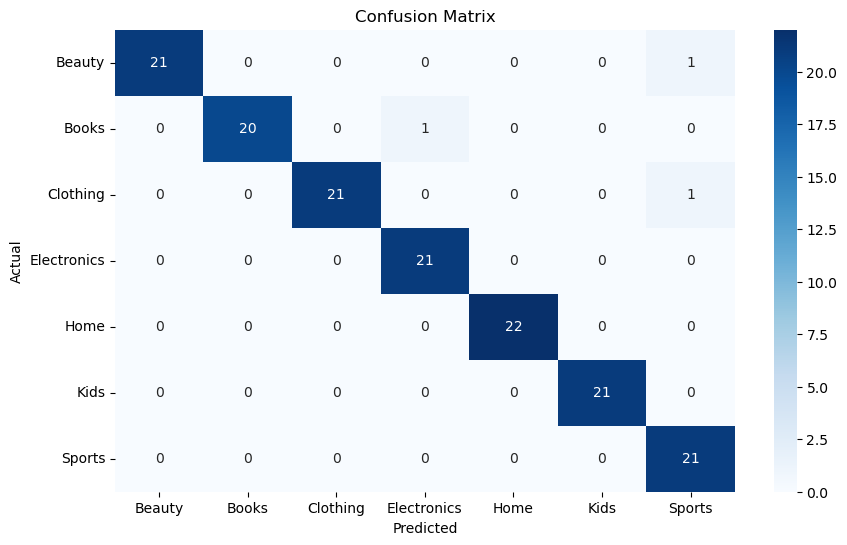

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = model.predict(X_test_vec)

# Classification Report
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [93]:
probs = model.predict_proba(tfidf.transform(data['Product Title']))
data['Prediction_Confidence'] = probs.max(axis=1)


Tag prediction with low confidence as Need Review

In [95]:
data['Review_Flag'] = data['Prediction_Confidence'] < 0.6


In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

      Beauty       1.00      0.95      0.98        22
       Books       1.00      0.95      0.98        21
    Clothing       1.00      0.95      0.98        22
 Electronics       0.95      1.00      0.98        21
        Home       1.00      1.00      1.00        22
        Kids       1.00      1.00      1.00        21
      Sports       0.91      1.00      0.95        21

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



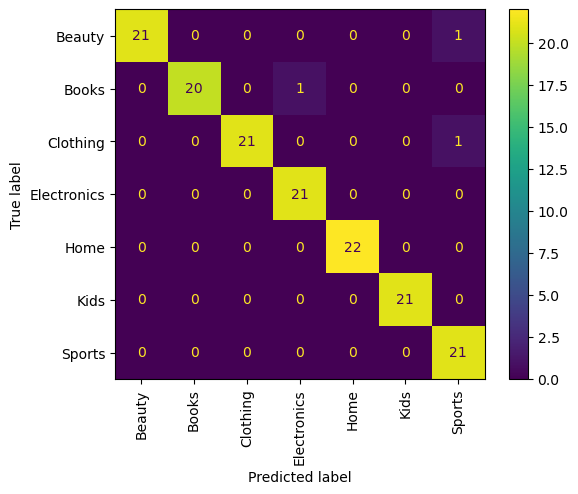

In [119]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test_vec, y_test, display_labels=le.classes_, xticks_rotation=90)
plt.show()


In [125]:
data.to_csv("ecommerce_with_predictions.csv", index=False)
print("Updated CSV with prediction confidence and review flag")


Updated CSV with prediction confidence and review flag


In [135]:

X_test_text = X_test.reset_index(drop=True)

y_test_reset = pd.Series(y_test).reset_index(drop=True)
y_pred_reset = pd.Series(y_pred).reset_index(drop=True)

mask_wrong = y_test_reset != y_pred_reset


wrong_preds_df = pd.DataFrame({
    'Title': X_test_text[mask_wrong],
    'Actual': le.inverse_transform(y_test_reset[mask_wrong]),
    'Predicted': le.inverse_transform(y_pred_reset[mask_wrong])
})

print(wrong_preds_df.head())


                         Title    Actual    Predicted
44     Top Workbook for Sports  Clothing       Sports
70   New Dress for Electronics     Books  Electronics
81  Premium Cushion for Sports    Beauty       Sports
